# Unsupervised machine learning 
It is the machine learning task of inferring a function to describe hidden structure from “unlabeled” data (a classification or categorization is not included in the observations). Common scenarios for using unsupervised learning algorithms include:
- Data Exploration
- Outlier Detection
- Pattern Recognition

# K-Means
The most common and simplest clustering algorithm out there is the K-Means clustering. This algorithms involve you telling the algorithms how many possible cluster (or K) there are in the dataset. The algorithm then iteratively moves the k-centers and selects the datapoints that are closest to that centroid in the cluster.

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

In [2]:
#Iris Dataset
iris = datasets.load_iris()
X = iris.data

In [3]:
#KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_

Text(0.5, 0.92, 'K Means')

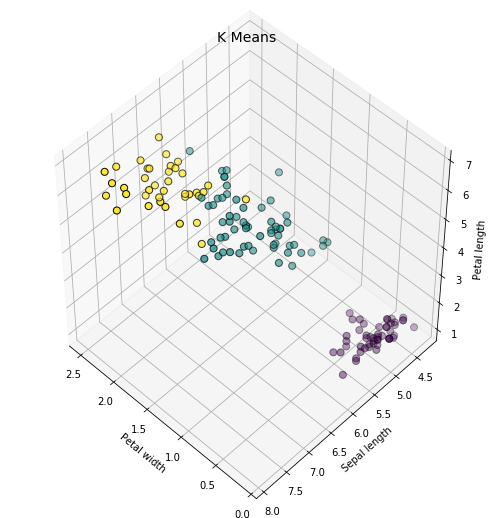

In [4]:
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

One issue with K-means, as see in the 3D diagram above, is that it does hard labels. However, you can see that datapoints at the boundary of the purple and yellow clusters can be either one. For such circumstances, a different approach may be necessary.

# Mixture Models
In K-Means, we do what is called “hard labeling”, where we simply add the label of the maximum probability. However, certain data points that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. In such circumstances, we look at all the probabilities instead of the max probability. This is known as “soft labeling”.

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)

Text(0.5, 0.92, 'Gaussian Mixture Model')

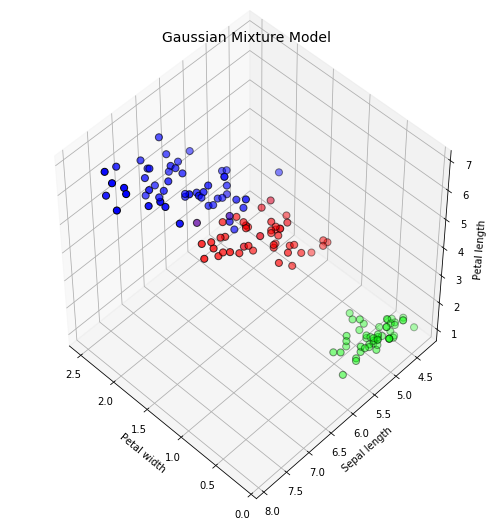

In [6]:
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

For the above Gaussian Mixure Model, the colors of the datapoints are based on the Gaussian probability of being near the cluster. The RGB values are based on the nearness to each of the red, blue and green clusters. If you look at the datapoints near the boundary of the blue and red cluster, you shall see purple, indicating the datapoints are close to either clusters.

# Topic Modelling
Since we have talked about numerical values, let’s take a turn towards categorical values. One such application is text analytics. Common approach for such problems is topic modelling, where documents or words in a document are categorized into topics. The simplest of these is the TF-IDF model. The TF-IDF model classifies words based on their importance. This is determined by how frequent are they in specific documents (e.g. specific science topics in scientific journals) and words that are common among all documents (e.g. stop words).

# Hidden Markov Model
Finally, let’s cover some timeseries analysis. For clustering, my favourite is using Hidden Markov Models or HMM. In a Markov Model, we look for states and the probability of the next state given the current state. An example below is of a dog’s life in Markov Model.



Let’s assume the dog is sick. Given the current state, there is a 0.6 chance it will continue being sick the next hour, 0.4 that it is sleeping, 05 pooping, 0.1 eating and 0.4 that it will be healthy again. In an HMM, you provide how many states there may be inside the timeseries data for the model to compute. An example of the Boston house prices dataset is given below with 3 states.